In [2]:
import os
from torch.utils.data import DataLoader
from dataloader import create_dataset_v1v6
import matplotlib.pyplot as plt
from PIL import ImageOps
import torchvision
import numpy as np
import cv2

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [11]:
path = os.getcwd()
path = '/root/notebooks/sample/dataset/ECG100_224/'

#path = '/root/notebooks/data/ECG100_224_re/'

In [12]:
train_dataloader,test_dataloader,label_lead=create_dataset_v1v6(path,16,None)

print(train_dataloader)
print(test_dataloader)
print(label_lead.shape)

Classification label : {'Lateral': 0, 'Posterior': 1, 'Anterior': 2, 'Inferior': 3, 'Normal': 4}
Number of datas 378


torch.Size([6, 378, 3, 112, 224])
378
378
torch.Size([378, 6])


In [13]:
def imshow_allimage(img,num,title,xlabel):
    img = torchvision.utils.make_grid(img,nrow=num)
    npimg = img.to('cpu').detach().numpy().copy()
    plt.figure(figsize=(20,20))
    plt.title(title)
    plt.xlabel(xlabel)
    im=np.transpose(npimg, (1,2,0))
    plt.imshow(im)
    plt.show()

In [14]:
def imshow_oneimage(img,label_lead,patients):
    print(label_lead)
    fig = plt.figure(figsize=(32,4),dpi=400)
    fig.suptitle(patients,fontsize=20)
    img = img.to('cpu').detach().numpy().copy()
    X = 1
    Y = 6
    img1 = np.transpose(img[0],(1,2,0))
    ax1 = fig.add_subplot(X, Y, 1)
    ax1.set_title(label_lead[0],fontsize=20)
    ax1.axis("off")
    plt.imshow(img1)
    img2 = np.transpose(img[1],(1,2,0))
    ax2 = fig.add_subplot(X, Y, 2)
    ax2.set_title(label_lead[1],fontsize=20)
    ax2.axis("off")
    plt.imshow(img2)
    img3 = np.transpose(img[2],(1,2,0))
    ax3 = fig.add_subplot(X, Y, 3)
    ax3.set_title(label_lead[2],fontsize=20)
    ax3.axis("off")
    plt.imshow(img3)
    img4 = np.transpose(img[3],(1,2,0))
    ax4 = fig.add_subplot(X, Y, 4)
    ax4.set_title(label_lead[3],fontsize=20)
    ax4.axis("off")
    plt.imshow(img4)
    img5 = np.transpose(img[4],(1,2,0))
    ax5 = fig.add_subplot(X, Y, 5)
    ax5.set_title(label_lead[4],fontsize=20)
    ax5.axis("off")
    plt.imshow(img5)
    img6 = np.transpose(img[5],(1,2,0))
    ax6 = fig.add_subplot(X, Y, 6)
    ax6.set_title(label_lead[5],fontsize=20)
    ax6.axis("off")
    plt.imshow(img6)


In [15]:
for counter, (images,_,label_lead,_,_) in enumerate(train_dataloader, 0):
    print(images.shape)
    #print(labels)
    print(label_lead.shape)
    #print(patients)
    #print(num_leads)
    #imgs=images.reshape(-1,3,112,224)
    #imshow_allimage(imgs,6,'title','allimage')
    break

torch.Size([16, 6, 3, 112, 224])
torch.Size([16, 6])


[3, 0, 5, 1, 4, 2]


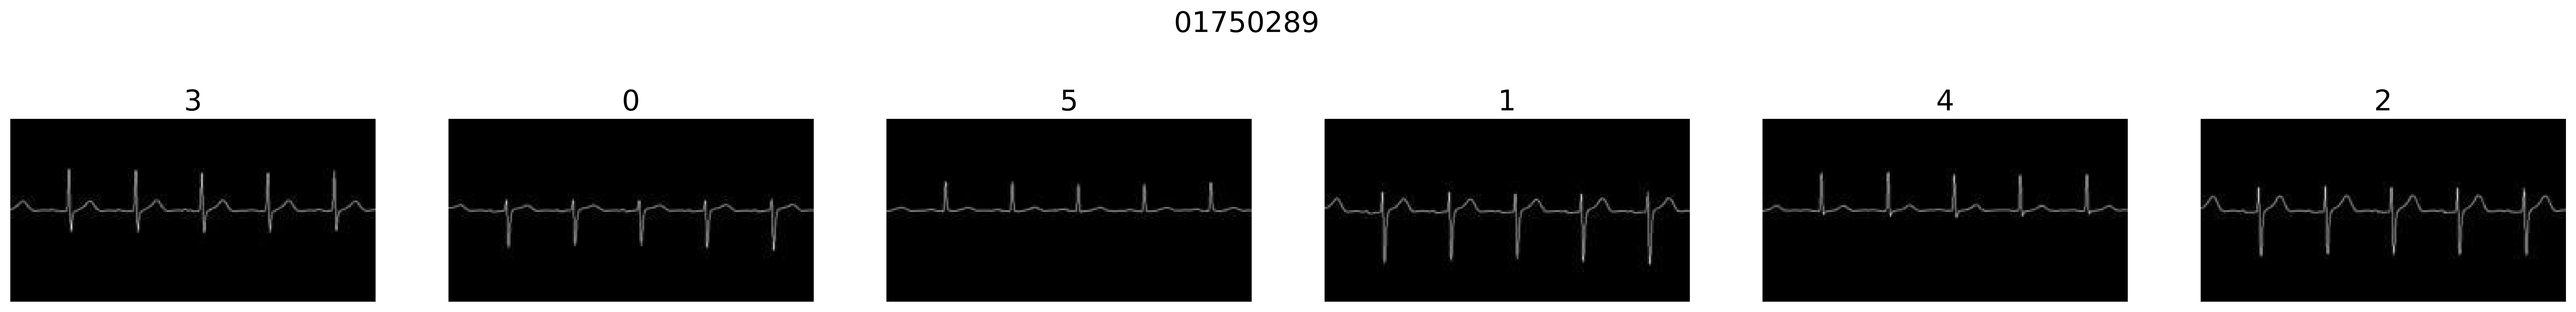

In [16]:
for counter, (images,labels,label_lead,patients,num_leads) in enumerate(train_dataloader, 0):
    #print(images.shape)
    #print(labels)
    #print(label_lead)
    #0がV1,5がV6
    #print(patients)
    #print(num_leads)
    imgs=images[0].reshape(-1,3,112,224)
    patients=patients[0]
    label = label_lead[0].tolist()
    imshow_oneimage(imgs,label,patients)
    break

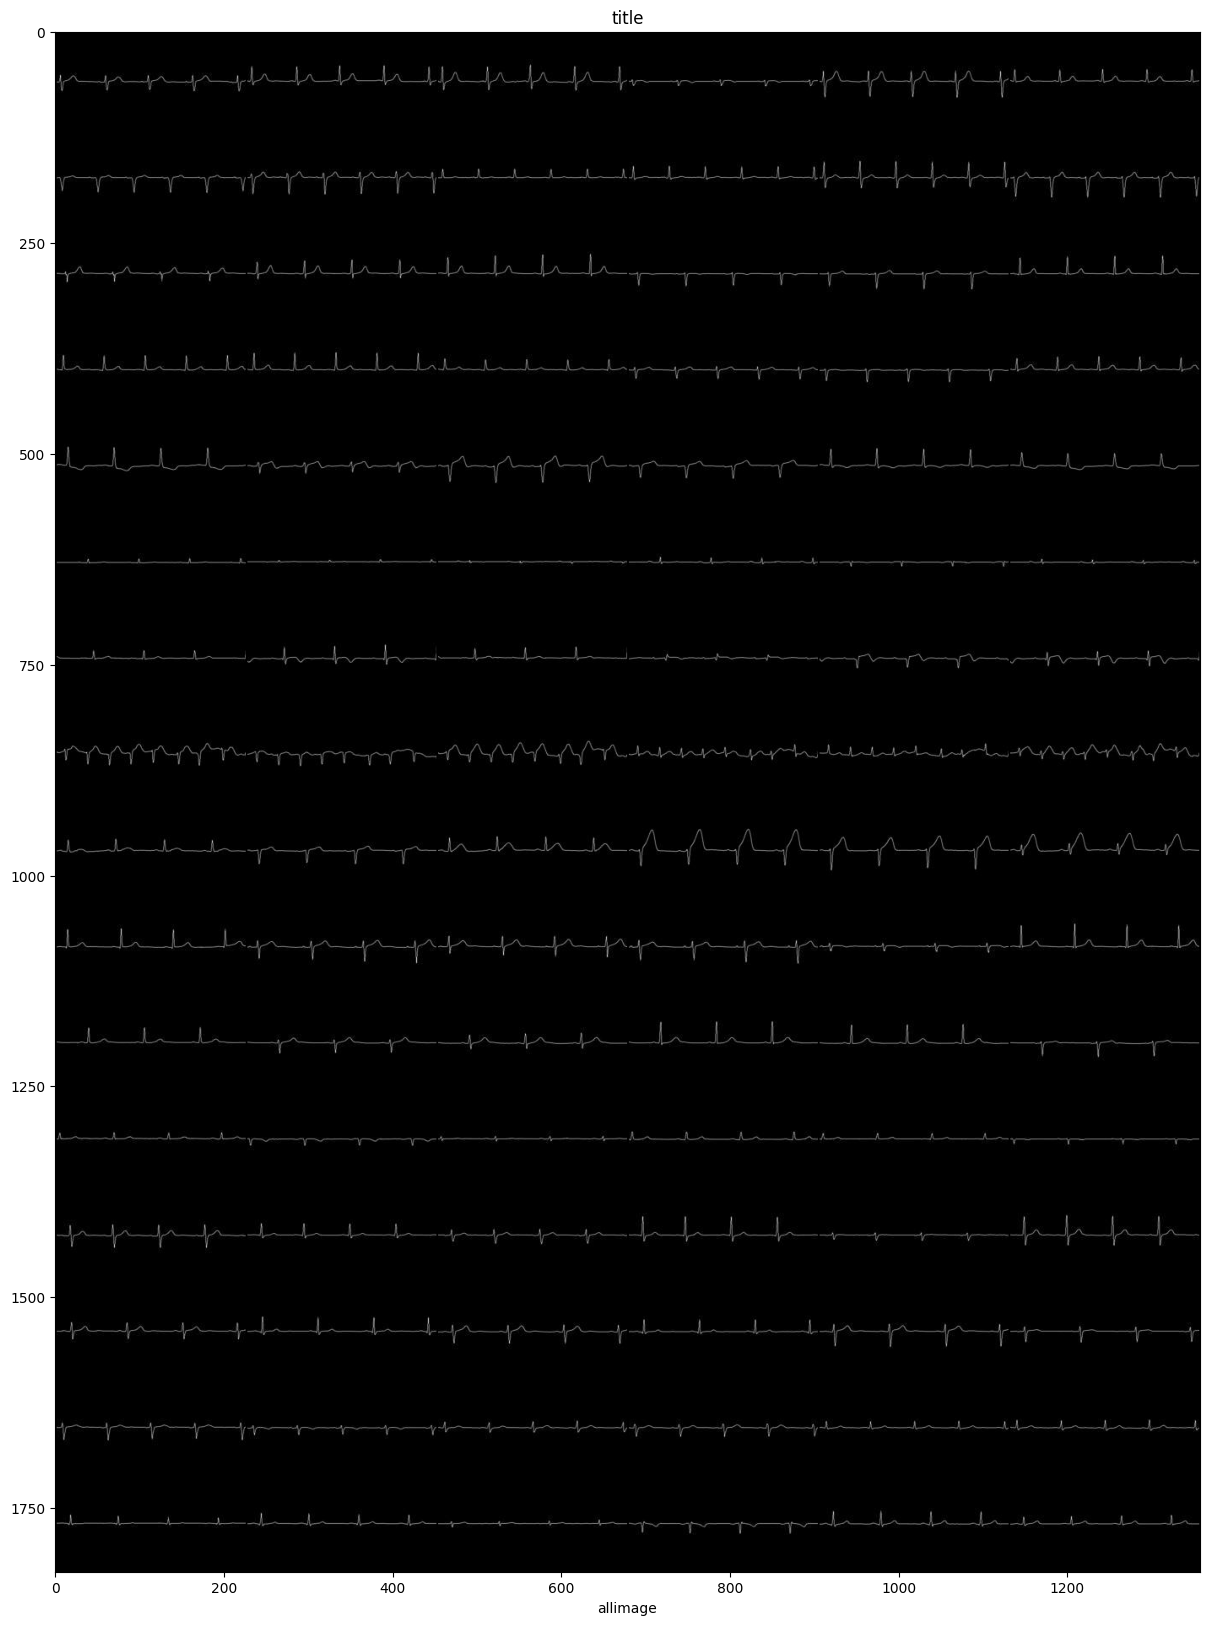

In [17]:
for counter, (images,labels,label_lead,patients,num_leads) in enumerate(train_dataloader, 0):
    #print(images.shape)
    #print(labels)
    #print(label_lead)
    #print(patients){}
    #print(num_leads)
    imgs=images.reshape(-1,3,112,224)
    imshow_allimage(imgs,6,'title','allimage')
    break

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # 畳み込み層や全結合層などを定義する
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.faltten = nn.Flatten()
        self.fc1 = nn.Linear(16,16)
        self.fc2 = nn.Linear(16, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.gap(x)
        x = self.faltten(x)
        #x = x.view(-1, 16 * 56 * 112)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# モデルのインスタンスを作成
model = CNNModel().to(device)

/python/build/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
print(model)

print(train_dataloader)


CNNModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap): AdaptiveAvgPool2d(output_size=1)
  (faltten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=6, bias=True)
)


In [ ]:
print(label_lead.shape)
#print(label_lead)
print(images.shape)

torch.Size([16, 6])
torch.Size([16, 6, 3, 112, 224])


In [ ]:
import torch.optim as optim

# 損失関数
criterion = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
print(images.shape)

torch.Size([16, 6, 3, 112, 224])


In [ ]:
from sklearn.metrics import *

In [ ]:
num_epochs = 50
import torch.optim as optim

# 損失関数
criterion = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(model.parameters(), lr=0.0001)
bestscore = 1000.0
loss_list,loss_list_test = [], []
f1s, f1s_test = [],[]
acc, acc_test = [], []


for epoch in range(num_epochs):
    model.train()
    running_loss, running_loss_test = 0.0, 0.0
    preds, label =[], []
    preds_test,label_test = [], []

    for ecg_image,labels,label_lead,patients,num_leads in train_dataloader:
        image =ecg_image.reshape(-1,3,112,224).to(device)
        label_lead = label_lead.reshape(-1).to(device)
        optimizer.zero_grad()  # 勾配を初期化

        outputs = model(image)  # モデルの出力を計算
        
        prob, pred=torch.max(outputs,1)
        preds.extend(pred.tolist())
        label.extend(label_lead.tolist())
        loss = criterion(outputs, label_lead)  # 損失を計算
        loss.backward()  # 勾配を計算
        optimizer.step()  # パラメータを更新

        running_loss += loss.item()

    
    for ecg_image,labels,label_lead,patients,num_leads in test_dataloader:
        image =ecg_image.reshape(-1,3,112,224).to(device)
        label_lead = label_lead.reshape(-1).to(device)

        outputs = model(image)  # モデルの出力を計算
        prob, pred=torch.max(outputs,1)
        preds_test.extend(pred.tolist())
        label_test.extend(label_lead.tolist())
        
        #print(outputs)
        loss = criterion(outputs, label_lead)  # 損失を計算


        running_loss_test += loss.item()
    
    score = running_loss_test/len(test_dataloader)
    if score < bestscore:
        bestscore = score
        torch.save(model.state_dict(), '/root/notebooks/sample/models/bestmodel.pth')
        print('best score!!')
    loss_list.append(running_loss/len(train_dataloader))
    loss_list_test.append(running_loss_test/len(test_dataloader))
    f1 = f1_score(preds,label,average='macro')
    f1_test = f1_score(preds_test,label_test,average='macro')
    f1s.append(f1)
    f1s_test.append(f1_test)
    accuracy = accuracy_score(preds,label)
    accuracy_test = accuracy_score(preds_test,label_test)
    acc.append(accuracy)
    acc_test.append(accuracy_test)


    # 1エポック終了時の損失を表示
    print(f"Epoch [{epoch+1}/{num_epochs}] Train-Loss: {running_loss/len(train_dataloader)} Test-Loss: {running_loss_test/len(train_dataloader)} Train-f1: {f1} Test-f1: {f1_test}")


best score!!
Epoch [1/5000] Train-Loss: 1.7971318270030774 Test-Loss: 0.4728300759666844 Train-f1: 0.047619047619047616 Test-f1: 0.047619047619047616
best score!!
Epoch [2/5000] Train-Loss: 1.7964182527441728 Test-Loss: 0.47264433534521805 Train-f1: 0.047619047619047616 Test-f1: 0.047619047619047616
best score!!
Epoch [3/5000] Train-Loss: 1.7957552796915959 Test-Loss: 0.4724860254086946 Train-f1: 0.047619047619047616 Test-f1: 0.047619047619047616
best score!!
Epoch [4/5000] Train-Loss: 1.7951713800430298 Test-Loss: 0.4723369636033711 Train-f1: 0.047619047619047616 Test-f1: 0.047619047619047616
best score!!
Epoch [5/5000] Train-Loss: 1.7946154632066424 Test-Loss: 0.47219397519764145 Train-f1: 0.047619047619047616 Test-f1: 0.047619047619047616
best score!!
Epoch [6/5000] Train-Loss: 1.794084159951461 Test-Loss: 0.4720589612659655 Train-f1: 0.047619047619047616 Test-f1: 0.047619047619047616
best score!!
Epoch [7/5000] Train-Loss: 1.7935865678285297 Test-Loss: 0.4719344942193282 Train-f1: 

In [ ]:
print(label_lead.shape)
print(label_lead)
print(preds)
print(len(test_dataloader))

torch.Size([72])
tensor([1, 4, 0, 5, 2, 3, 2, 0, 3, 5, 1, 4, 2, 0, 3, 5, 1, 4, 4, 3, 5, 0, 1, 2,
        3, 5, 1, 2, 0, 4, 3, 1, 5, 4, 2, 0, 4, 2, 1, 5, 0, 3, 3, 0, 4, 5, 2, 1,
        1, 0, 5, 3, 2, 4, 2, 5, 1, 3, 0, 4, 3, 5, 2, 0, 4, 1, 0, 3, 2, 1, 5, 4],
       device='cuda:0')
[0, 2, 3, 0, 0, 4, 1, 0, 0, 2, 0, 4, 4, 2, 2, 4, 5, 3, 2, 3, 0, 5, 2, 4, 5, 0, 5, 1, 3, 1, 2, 0, 5, 0, 3, 4, 2, 4, 1, 5, 0, 1, 5, 0, 4, 4, 3, 0, 0, 1, 5, 0, 4, 3, 4, 5, 0, 1, 3, 3, 5, 2, 5, 3, 0, 0, 4, 2, 0, 5, 2, 3, 3, 5, 5, 4, 5, 0, 1, 3, 0, 2, 3, 4, 3, 2, 3, 1, 0, 4, 3, 1, 5, 2, 1, 5, 3, 1, 2, 3, 3, 0, 2, 1, 4, 3, 0, 4, 4, 4, 0, 3, 1, 2, 0, 5, 3, 1, 4, 0, 5, 0, 5, 0, 5, 3, 0, 5, 2, 5, 0, 5, 0, 4, 1, 3, 5, 2, 5, 0, 3, 4, 2, 1, 1, 3, 2, 2, 4, 3, 2, 5, 1, 3, 0, 1, 3, 0, 4, 3, 1, 1, 1, 3, 3, 1, 2, 5, 3, 0, 3, 4, 2, 2, 0, 0, 5, 0, 5, 5, 3, 0, 4, 4, 4, 4, 4, 0, 5, 0, 0, 4, 4, 3, 5, 0, 2, 4, 1, 4, 3, 2, 5, 1, 4, 2, 1, 4, 5, 2, 4, 5, 1, 0, 2, 1, 3, 0, 3, 5, 5, 4, 5, 0, 4, 2, 1, 3, 0, 4, 0, 0, 5, 0, 5, 5, 1, 1, 3, 

In [ ]:
pred,label = [],[]
model.load_state_dict(torch.load('/root/notebooks/sample/models/bestmodel.pth'))
model.eval()

for ecg_image,labels,label_lead,patients,num_leads in test_dataloader:
    image =ecg_image.reshape(-1,3,112,224).to(device)
    label_lead = label_lead.reshape(-1).to(device)
    label.extend(label_lead.tolist())
    outputs = model(image)  # モデルの出力を計算
    prob, preds=torch.max(outputs,1)
    pred.extend(preds.tolist())
    f1_test = f1_score(preds.tolist(),label_lead.tolist(),average='macro')
    #print(outputs)
    loss = criterion(outputs, label_lead)  # 損失を計算

    running_loss_test += loss.item()


In [ ]:
print(loss_list)

[1.7971318270030774, 1.7964182527441728, 1.7957552796915959, 1.7951713800430298, 1.7946154632066424, 1.794084159951461, 1.7935865678285297, 1.7931350720556158, 1.7927376408326, 1.7924060947016667, 1.7921407724681653, 1.7919187420292904, 1.7916380668941296, 1.791363703577142, 1.7910513438676532, 1.7906481404053538, 1.7901282122260647, 1.7893897420481633, 1.7882662321391858, 1.7866411209106445, 1.7845888326042576, 1.7817746589058323, 1.7778747709173905, 1.7741196030064632, 1.7698269517798173, 1.7651399624975104, 1.759821239270662, 1.7544905574698197, 1.7487071564323025, 1.7424742422605817, 1.7356535823721635, 1.7284711285641319, 1.7212254122683877, 1.7149122890673185, 1.708316495544032, 1.702575959657368, 1.6973591101797003, 1.6927363809786344, 1.6887830621317814, 1.6846723556518555, 1.6813644358986302, 1.6781617591255589, 1.6751427964160317, 1.6727633601740788, 1.6699649471985667, 1.6687716810326827, 1.6659913815950091, 1.6649177262657566, 1.6628781494341398, 1.6626193209698326, 1.66104

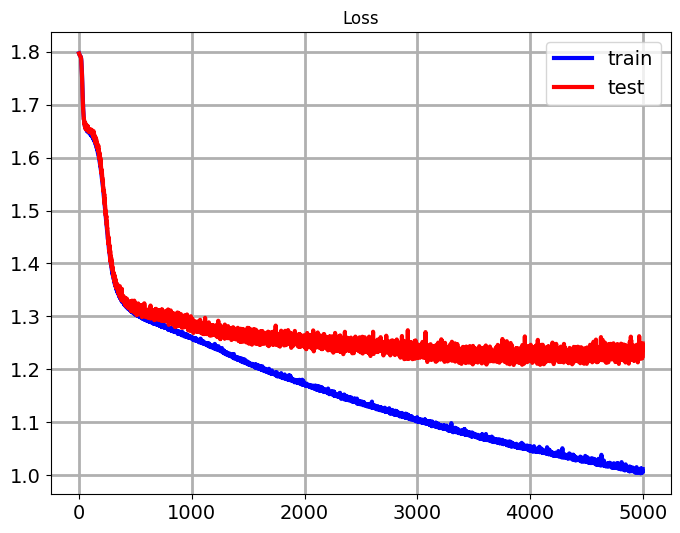

In [ ]:
# 学習曲線 (損失関数)
plt.figure(figsize=(8,6))
plt.plot(loss_list,label='train', lw=3, c='b')
plt.plot(loss_list_test,label='test', lw=3, c='r')
plt.title('Loss')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

In [ ]:
print(f1s_test)

[0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.051515151515151514, 0.058839102521675825, 0.07099985360854925, 0.07799361527477545, 0.1184801657212778, 0.1744982638860514, 0.17222211961139225, 0.18419912760124488, 0.17454410718914679, 0.17564851008948387, 0.18526020854730899, 0.2117874163007295, 0.1881333322411907, 0.18426446694163232, 0.17095044930570027, 0.15869168494503652, 0.14817093354277802, 0.15001920234221508, 0.15648672941826858, 0.14659431317689595, 0.1578263647415077, 0.14151190735933072, 0.1756379908003924, 0.16114415287321374, 0.16504998571890983, 0.1682875963318049, 0.17439119954452117, 0.17316113539726696, 0.17790529412203174,

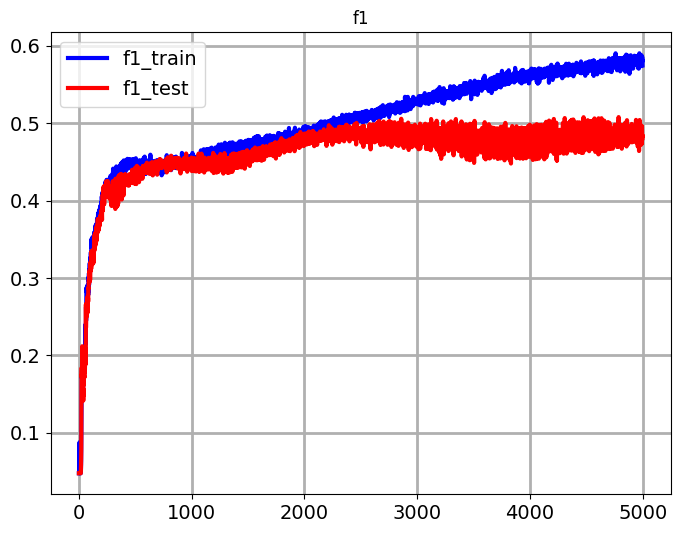

In [ ]:

# 学習曲線 (精度)
plt.figure(figsize=(8,6))
plt.plot(f1s,label='f1_train', lw=3, c='b')
plt.plot(f1s_test,label='f1_test', lw=3, c='r')
plt.title('f1')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()


/python/build/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/python/build/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/python/build/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/python/build/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/python/build/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_

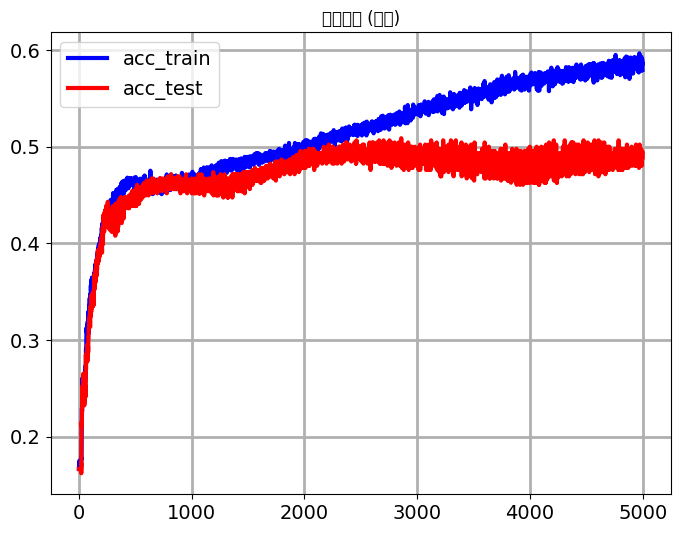

In [ ]:

# 学習曲線 (精度)
plt.figure(figsize=(8,6))
plt.plot(acc,label='acc_train', lw=3, c='b')
plt.plot(acc_test,label='acc_test', lw=3, c='r')
plt.title('学習曲線 (精度)')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
            """
            This function prints and plots the confusion matrix.
            Normalization can be applied by setting `normalize=True`.
            """
            if normalize:
                cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                print("Normalized confusion matrix")
            else:
                print('Confusion matrix, without normalization')
            print(cm)
            plt.imshow(cm, interpolation='nearest', cmap=cmap)
            plt.title(title)
            plt.colorbar()
            tick_marks = np.arange(len(classes))
            plt.xticks(tick_marks, classes, rotation=45)
            plt.yticks(tick_marks, classes)
            fmt = '.2f' if normalize else 'd'
            thresh = cm.max() / 2.
            for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            #plt.savefig(output_file)

Confusion matrix, without normalization
[[53 15  0  2  1  5]
 [ 9 36 23  6  0  2]
 [ 4 23 21 20  7  1]
 [ 3 11 13 25 14 10]
 [ 2  1  6 14 27 26]
 [ 2  3  1  3 16 51]]


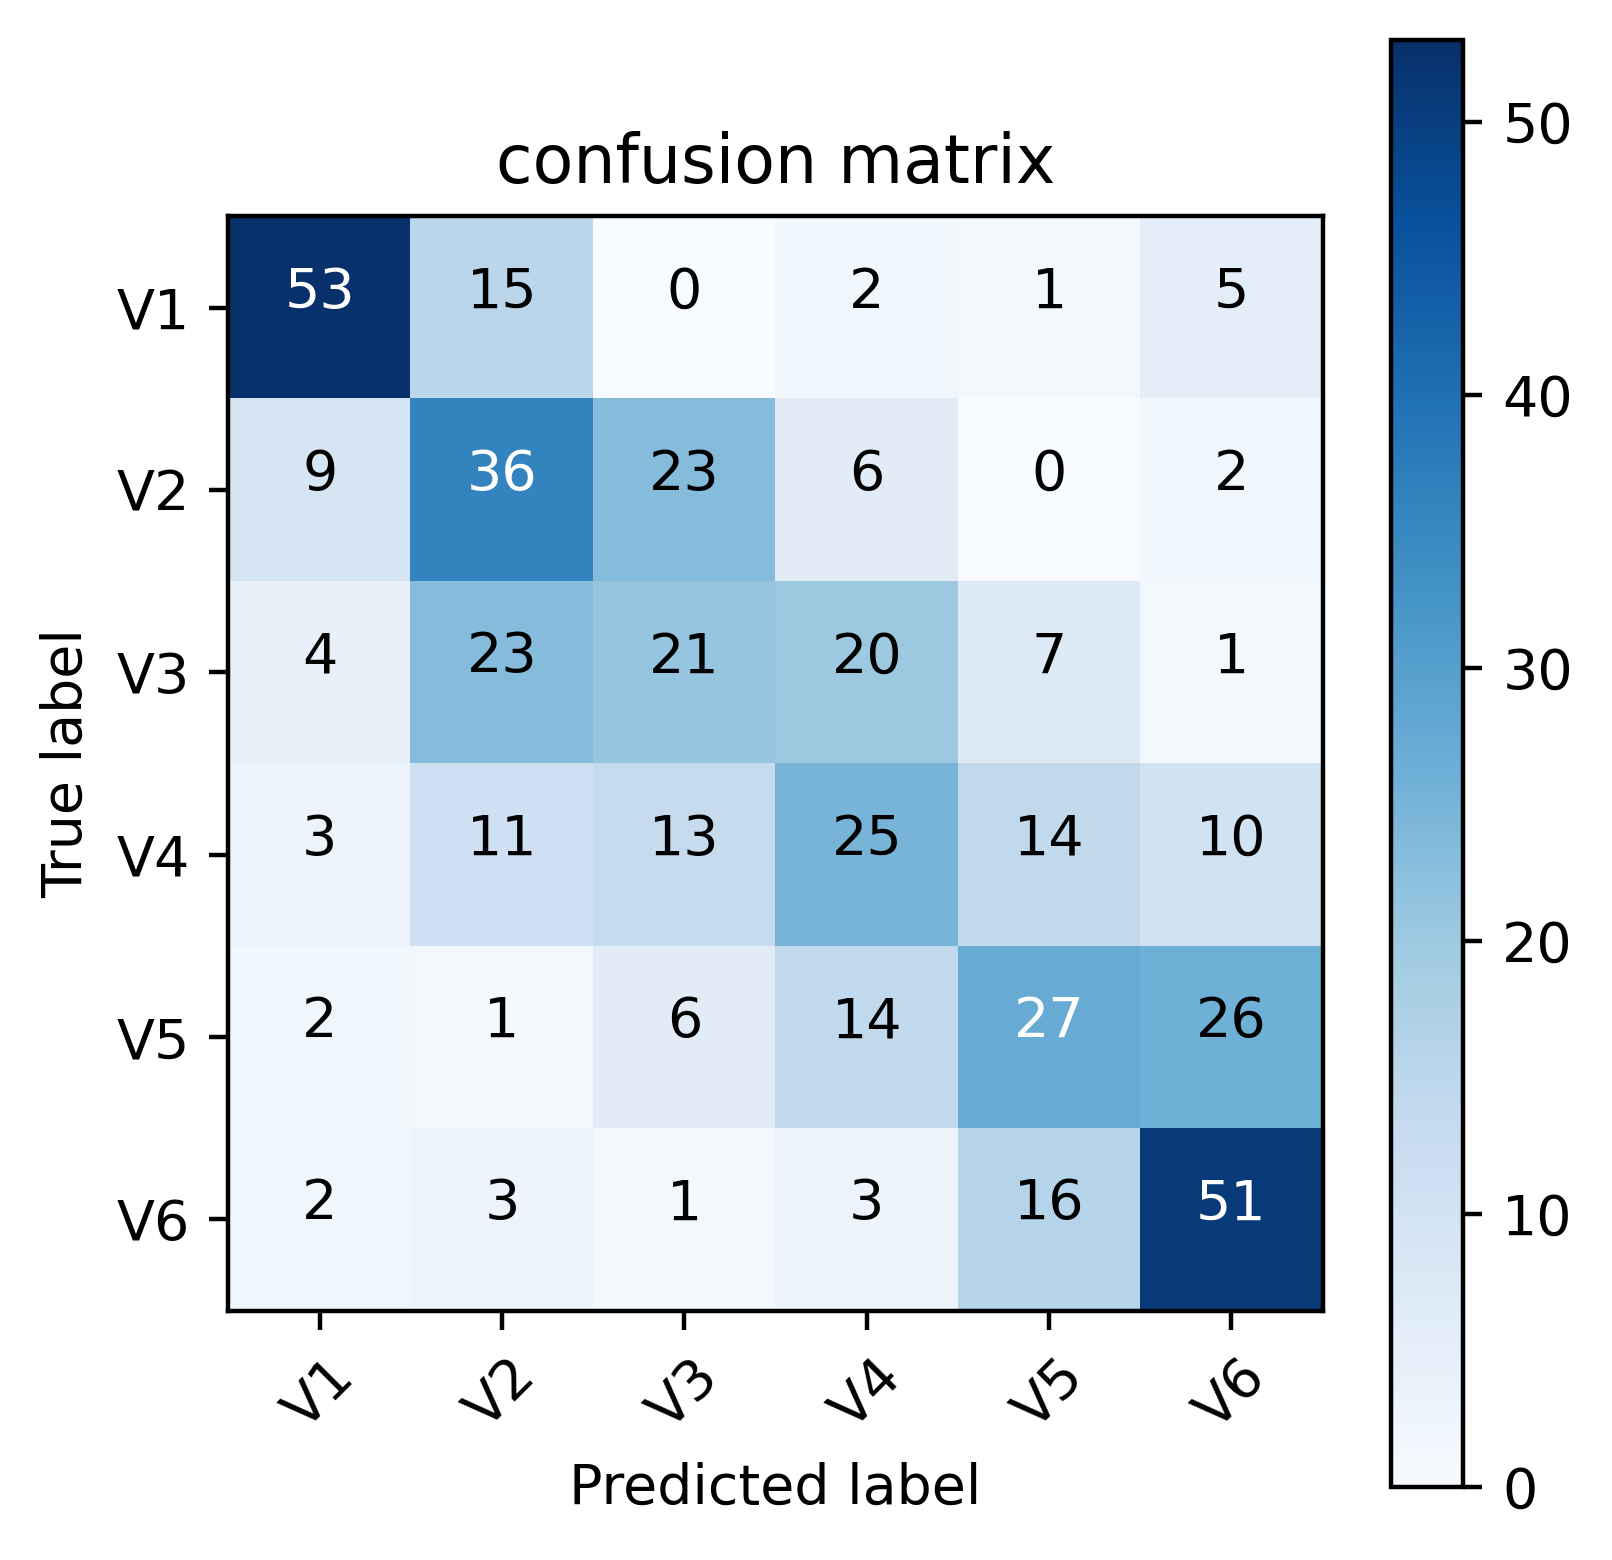

In [ ]:
labels=[0,1,2,3,4,5]
label2=['V1', 'V2', 'V3', 'V4', 'V5','V6']
cnf_matrix=confusion_matrix(label,pred,labels=labels)
title="confusion matrix"
plt.figure(figsize=(4,4),dpi=400)
plot_confusion_matrix(cnf_matrix, classes=label2,title=title)
plt.show()